## matplotlib.pyplot.imshow

### 기본적인 형태
- matplotlib.pyplot.imshow(X, cmap=None, norm=None, aspect=None, interpolation=None, alpha=None, vmin=None, vmax=None, origin=None, extent=None, *, filternorm=True, filterrad=4.0, resample=None, url=None, data=None, **kwargs)
- 데이터를 이미지나 2D(RBG(A)) 형태로 보여줌

#### 1. Multi Image

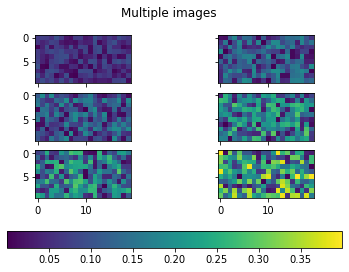

In [1]:
from matplotlib import colors
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(19680801)
Nr = 3
Nc = 2

fig, axs = plt.subplots(Nr, Nc)
fig.suptitle('Multiple images')

images = []
for i in range(Nr):
    for j in range(Nc):
        data = ((1+i+j)/10)*np.random.rand(10,20)
        images.append(axs[i,j].imshow(data))
        axs[i,j].label_outer()

vmin = min(image.get_array().min() for image in images)
vmax = max(image.get_array().max() for image in images)
norm = colors.Normalize(vmin=vmin, vmax=vmax)
for im in images:
    im.set_norm(norm)

fig.colorbar(images[0], ax=axs, orientation='horizontal', fraction=.1)

def update(changed_image):
    for im in images:
        if(changed_image.get_cmap() != im.get_cmap()
              or changed_image.get_clim() != im.get_clim()):
            im.set_cmap(changed_image.get_cmap())
            im.set_clim(changed_image.get_clim())

for im in images:
    im.callbacksSM.connect('changed', update)
    
plt.show()

#### 2. Simple Categorical Heatmap

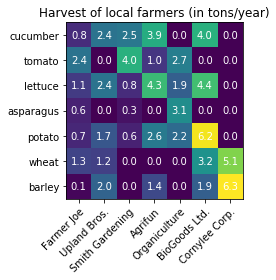

In [6]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

vegetables = ["cucumber", "tomato", "lettuce", "asparagus",
              "potato", "wheat", "barley"]
farmers = ["Farmer Joe", "Upland Bros.", "Smith Gardening",
           "Agrifun", "Organiculture", "BioGoods Ltd.", "Cornylee Corp."]

harvest = np.array([[0.8, 2.4, 2.5, 3.9, 0.0, 4.0, 0.0],
                    [2.4, 0.0, 4.0, 1.0, 2.7, 0.0, 0.0],
                    [1.1, 2.4, 0.8, 4.3, 1.9, 4.4, 0.0],
                    [0.6, 0.0, 0.3, 0.0, 3.1, 0.0, 0.0],
                    [0.7, 1.7, 0.6, 2.6, 2.2, 6.2, 0.0],
                    [1.3, 1.2, 0.0, 0.0, 0.0, 3.2, 5.1],
                    [0.1, 2.0, 0.0, 1.4, 0.0, 1.9, 6.3]])


fig, ax = plt.subplots()
im = ax.imshow(harvest)

ax.set_xticks(np.arange(len(farmers)))
ax.set_yticks(np.arange(len(vegetables)))

ax.set_xticklabels(farmers)
ax.set_yticklabels(vegetables)

plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

for i in range(len(vegetables)):
    for j in range(len(farmers)):
        text = ax.text(j, i, harvest[i, j],
                       ha="center", va="center", color="w")

ax.set_title("Harvest of local farmers (in tons/year)")
fig.tight_layout()
plt.show()